In [1]:
usage = """Run with papermill:
     
papermill BQSR_report.ipynb output_BQSR_report.ipynb \
    -p report_name <> \
    -p model_file <> \
    -p output_roc_plot <> \
    -p output_LoD_plot <> \
    -p output_cm_plot <> \
    -p output_precision_recall_qual <> \
    -p output_qual_density <> \
    -p output_obsereved_qual_plot <> \
    -p output_ML_qual_hist <> \
    -p output_qual_per_feature <> \
    -p output_bepcr_hists <> \
    -p output_bepcr_fpr <> \
    -p output_bepcr_recalls <>
Then convert to html

jupyter nbconvert --to html output_BQSR_report.ipynb --template classic --no-input --output BQSR_report.html"""

In [5]:
import pandas as pd
import os
from IPython.display import Image, HTML
import joblib
import json

pd.options.display.max_rows = 200

In [3]:
# papermill parameters
report_name = None
model_file = None
output_roc_plot = None
output_LoD_plot = None
output_cm_plot = None
output_precision_recall_qual = None
output_qual_density = None
output_obsereved_qual_plot = None
output_ML_qual_hist = None
output_qual_per_feature = None
output_bepcr_hists = None
output_bepcr_fpr = None
output_bepcr_recalls = None

In [4]:
# check that we got all the inputs
missing = list()
for varname in [
    "report_name",
    "model_file",
    "output_roc_plot",
    "output_LoD_plot",
    "output_cm_plot",
    "output_precision_recall_qual",
    "output_qual_density",
    "output_obsereved_qual_plot",
    "output_ML_qual_hist",
    "output_qual_per_feature",
    "output_bepcr_hists",
    "output_bepcr_fpr",
    "output_bepcr_recalls",
]:
    if locals()[varname] is None:
        missing.append(varname)

if len(missing) > 0:
    raise ValueError(f"Following inputs missing:\n{(os.linesep).join(missing)}")

ValueError: Following inputs missing:
report_name
model_file
X_file
y_file
params_file

In [2]:
# for debug
report_name = "test"
model_file = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.model.joblib"
output_roc_plot = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.ROC_curve.png"
output_LoD_plot = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.confusion_matrix.png"
output_cm_plot = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.confusion_matrix.png"
output_precision_recall_qual = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.precision_recall_qual.png"
output_qual_density = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.qual_density.png"
output_obsereved_qual_plot = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.observed_qual.png"
output_ML_qual_hist = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.ML_qual_hist.png"
output_qual_per_feature = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.qual_per_"
output_bepcr_hists = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.bepcr_"
output_bepcr_fpr = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.bepcr_fpr.png"
output_bepcr_recalls = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.bepcr_recalls.png"
params_file = "/data1/work/rinas/xgbpipeline/balanced_ePCR_LA5_LA6_333_bLaDt_06.params.json"

In [6]:
# load files
xgb_classifier = joblib.load(model_file)
with open(params_file, 'r', encoding="utf-8") as f:
    params = json.load(f)

In [8]:
display(HTML(f'<font size="6">BQSR training report - {report_name}</font>'))

# Introduction 

This report contains an analysis of the BQSR model training. The model is xgboost NN, trained as binary classifier per read. The probabilities are translated to quality: quality = -10*log10(probability). The quality is later used for discrimination between true and false variants in mrd analysis.

# AUC curve

In [28]:
# Image(output_roc_plot, width=1000)

## LoD

We calculate the residual snv rate as following: 

error rate in test data = # errors / # bases sequenced

where:

\# errors = # of single substitution snps > filter thresh
\# bases sequenced = # of bases aligned * % mapq60 * ratio_of_bases_in_coverage_range * read_filter_correction_factor * recall\[threshold\]

and: 
\# of bases aligned = mean_coverage * bases in region * downsampling factor
downsampling factor = % of the featuremap reads sampled for test set


In [ ]:
# Image(output_LoD_plot, width=1000)

# Training metrics

In [29]:
# print(f"Forest size: {params['model_params']['forest_size']}")
# print('\nLabels counts:')
# print(y_test['label'].value_counts())
# print('\nclassification report:')
# print(classification_report(df['XGB_prediction_1'], y_test['label']))
# print('\nprobabilities statistics:')
# print(pd.DataFrame(df[['XGB_prob_0','XGB_prob_1']]).describe())



In [30]:
# Image(output_cm_plot, width=1000)
# Image(output_cm_plot, width=1000)
# Image(output_cm_plot, width=1000)
# Image(output_cm_plot, width=1000)
# Image(output_cm_plot, width=1000)
# Image(output_cm_plot, width=1000)
# Image(output_cm_plot, width=1000)
# Image(output_cm_plot, width=1000)

In [ ]:
output_cm_plot = None
output_precision_recall_qual = None
output_qual_density = None
output_obsereved_qual_plot = None
output_ML_qual_hist = None
output_qual_per_feature = None
output_bepcr_hists = None
output_bepcr_fpr = None
output_bepcr_recalls = None

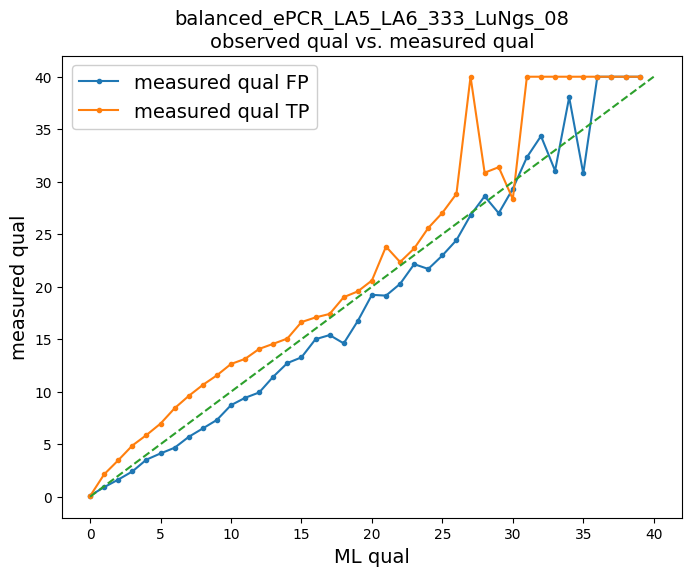

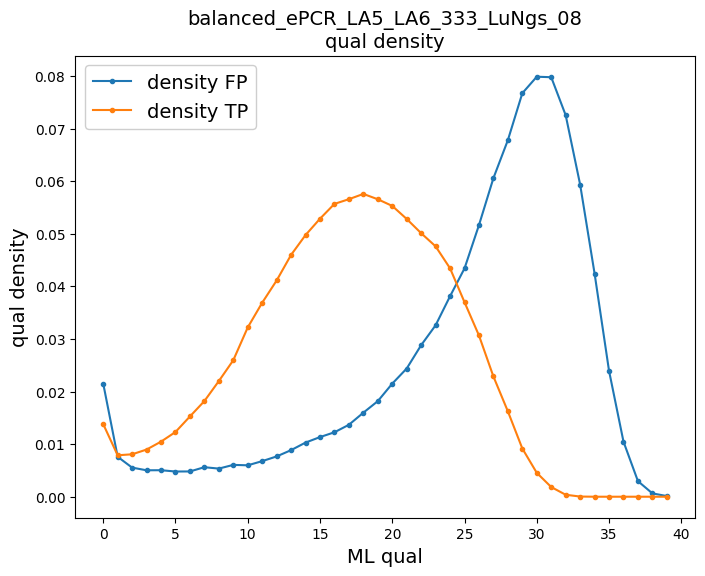

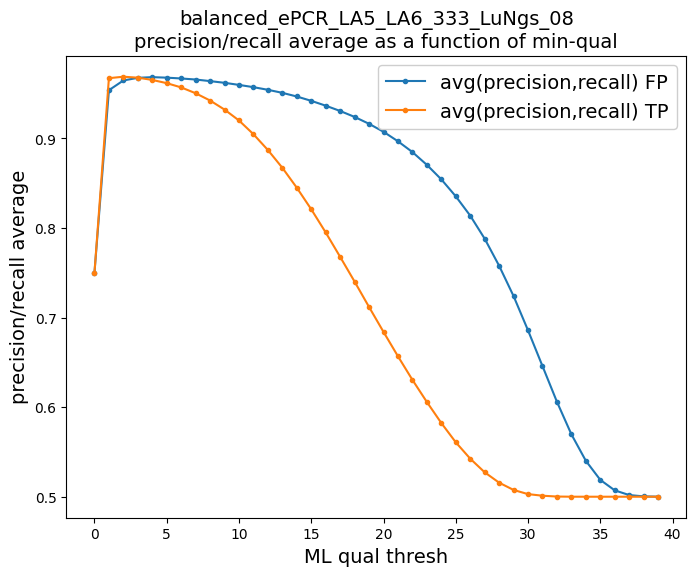

In [10]:
def plot_observed_vs_measured_qual(
    labels_dict,
    fprs,
    max_score,
    title: str = "",
    output_filename: str = None,
    fs = 14,
    ):

    plt.figure(figsize=(8,6))    
    for label in labels_dict:
        plot_precision_recall(fprs[label], 
                            [f'measured qual {labels_dict[label]}'], 
                            log_scale=False,
                            max_score=max_score)
    plt.plot([0,max_score], [0, max_score],'--')
    plt.xlabel('ML qual',fontsize=fs)
    plt.ylabel('measured qual',fontsize=fs)
    legend_handle = plt.legend(fontsize=fs, fancybox=True, framealpha=0.95)
    title_handle = plt.title(title, fontsize=fs)    

    if output_filename is not None:
        if not output_filename.endswith(".png"):
            output_filename += ".png"
        plt.savefig(
            output_filename,
            facecolor="w",
            dpi=300,
            bbox_inches="tight",
            bbox_extra_artists=[title_handle, legend_handle],
        )

    return

output_obsereved_qual_plot = os.path.join(params['workdir'], f"{params['out_basename']}observed_qual")
plot_observed_vs_measured_qual(labels_dict,fprs,max_score, title=f"{params['data_name']}\nobserved qual vs. measured qual", output_filename=output_obsereved_qual_plot)


def plot_qual_density(
    labels_dict,
    recalls,
    max_score,
    title: str = "",
    output_filename: str = None,
    fs = 14,
    ):

    plt.figure(figsize=(8,6))

    for label in labels_dict:
        plot_precision_recall(recalls[label], 
                            [f'density {labels_dict[label]}'],
                            log_scale=False,
                            max_score=max_score)

    legend_handle = plt.legend(fontsize=fs, fancybox=True, framealpha=0.95)
    title_handle = plt.title(title, fontsize=fs)    
    plt.xlabel('ML qual',fontsize=fs)
    plt.ylabel('qual density',fontsize=fs)

    if output_filename is not None:
        if not output_filename.endswith(".png"):
            output_filename += ".png"
        plt.savefig(
            output_filename,
            facecolor="w",
            dpi=300,
            bbox_inches="tight",
            bbox_extra_artists=[title_handle, legend_handle],
        )

    return

output_qual_density = os.path.join(params['workdir'], f"{params['out_basename']}qual_density")
plot_qual_density(labels_dict,recalls,max_score, title=f"{params['data_name']}\nqual density", output_filename=output_qual_density)


def plot_precision_recall_vs_qual_thresh(
    df,
    labels_dict,    
    max_score,
    title: str = "",
    output_filename: str = None,
    fs = 14,
    ):
    plt.figure(figsize=(8,6))
    plt.title('precision/recall average as a function of min-qual')
    for label in labels_dict:
        cum_avg_precision_recalls = []
        gtr = df['label'] == label
        cum_fprs_, cum_recalls_ = precision_recall_curve(df[f'XGB_qual_{label}'], 
                                                        max_score=max_score, 
                                                        y_true=gtr, 
                                                        cumulative=True, 
                                                        apply_log_trans=False
                                                        )
        cum_avg_precision_recalls.append([(precision+recall)/2 for precision,recall in zip(cum_fprs_, cum_recalls_)])

        plot_precision_recall(cum_avg_precision_recalls, 
                            [f'avg(precision,recall) {labels_dict[label]}'], 
                            log_scale=False,
                            max_score=max_score)

    legend_handle = plt.legend(fontsize=fs, fancybox=True, framealpha=0.95)
    title_handle = plt.title(title, fontsize=fs)    
    plt.xlabel('ML qual thresh',fontsize=fs)
    plt.ylabel('precision/recall average',fontsize=fs)

    if output_filename is not None:
        if not output_filename.endswith(".png"):
            output_filename += ".png"
        plt.savefig(
            output_filename,
            facecolor="w",
            dpi=300,
            bbox_inches="tight",
            bbox_extra_artists=[title_handle, legend_handle],
        )
    return

output_precision_recall_qual = os.path.join(params['workdir'], f"{params['out_basename']}precision_recall_qual")
plot_precision_recall_vs_qual_thresh(df,labels_dict,max_score, title=f"{params['data_name']}\nprecision/recall average as a function of min-qual", output_filename=output_precision_recall_qual)


# Model qual metrics: hists by class, calibration, recalls vs qual

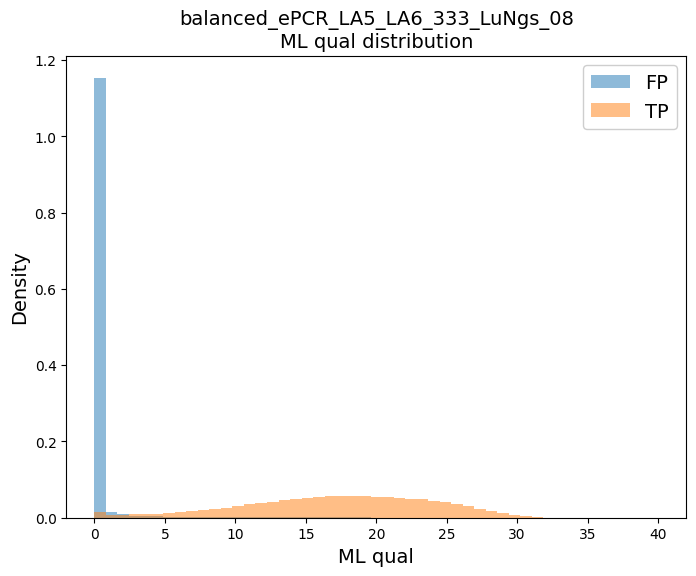

In [11]:
def plot_ML_qual_hist(
    labels_dict,
    df,
    max_score,
    title: str = "",
    output_filename: str = None,
    fs = 14,
    ):

    score = f'XGB_qual_1'

    plt.figure(figsize=[8, 6])
    plt.title("xgb")
    bins = np.linspace(0, max_score, 50)
    for label in labels_dict:    
        plt.hist(
            df[df["label"] == label][score].clip(
                upper=max_score
            ),
            bins=bins,
            alpha=0.5,
            label=labels_dict[label],
            density=True,
        )

    plt.xlabel('ML qual',fontsize=fs)
    plt.ylabel('Density',fontsize=fs)
    legend_handle = plt.legend(fontsize=fs, fancybox=True, framealpha=0.95)
    title_handle = plt.title(title, fontsize=fs)    

    if output_filename is not None:
        if not output_filename.endswith(".png"):
            output_filename += ".png"
        plt.savefig(
            output_filename,
            facecolor="w",
            dpi=300,
            bbox_inches="tight",
            bbox_extra_artists=[title_handle, legend_handle],
        )

    return

output_ML_qual_hist = os.path.join(params['workdir'], f"{params['out_basename']}ML_qual_hist")
plot_ML_qual_hist(labels_dict,df,max_score, title=f"{params['data_name']}\nML qual distribution", output_filename=output_ML_qual_hist)


# features distribution by classes

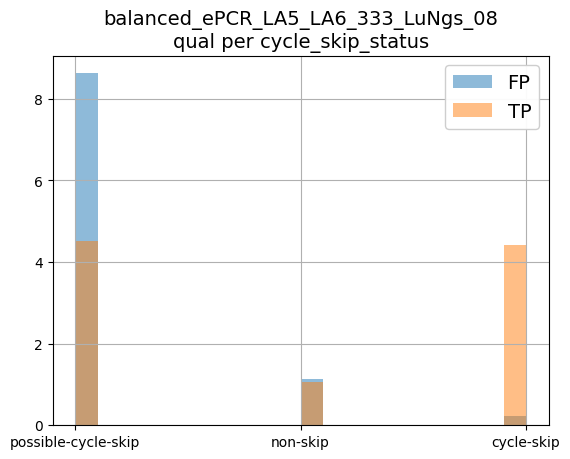

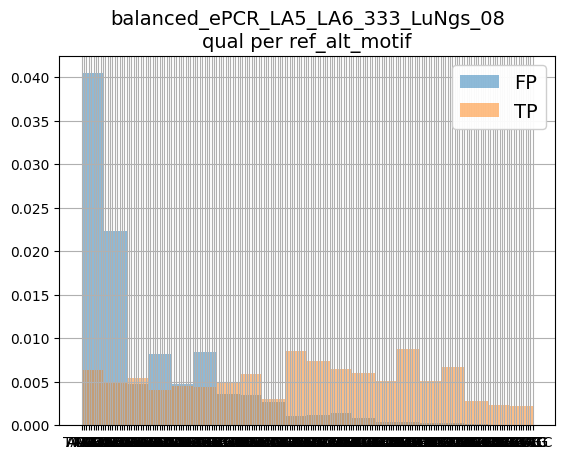

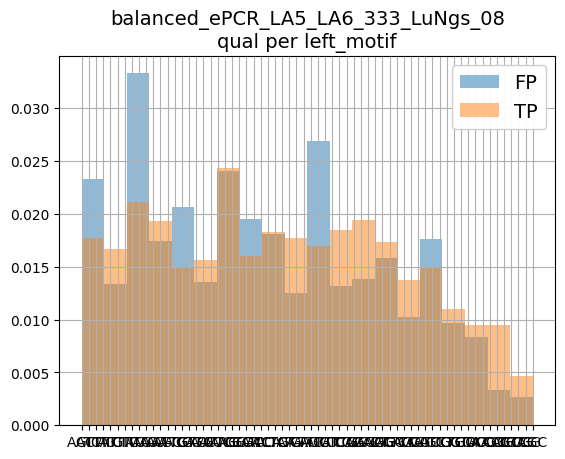

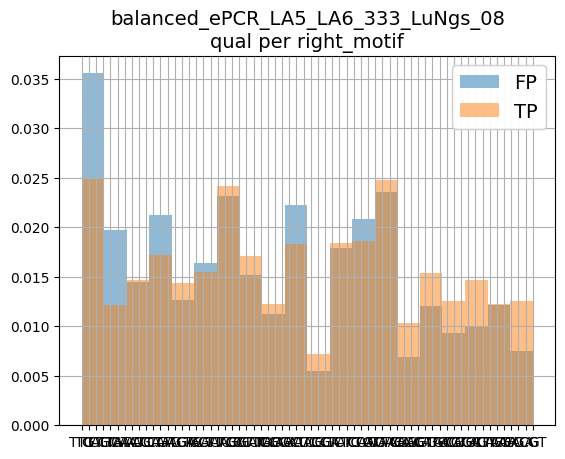

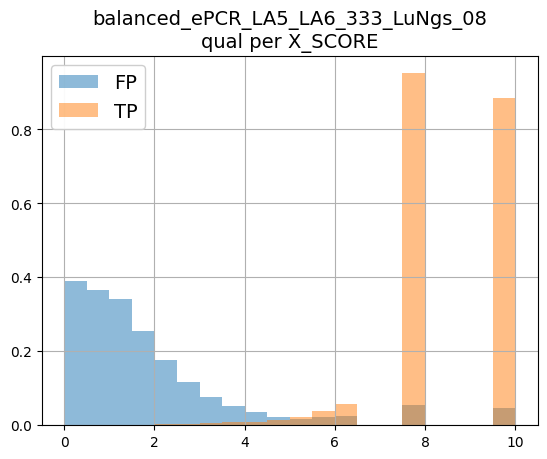

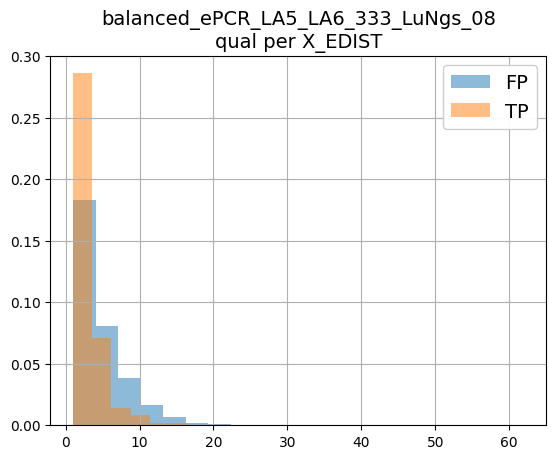

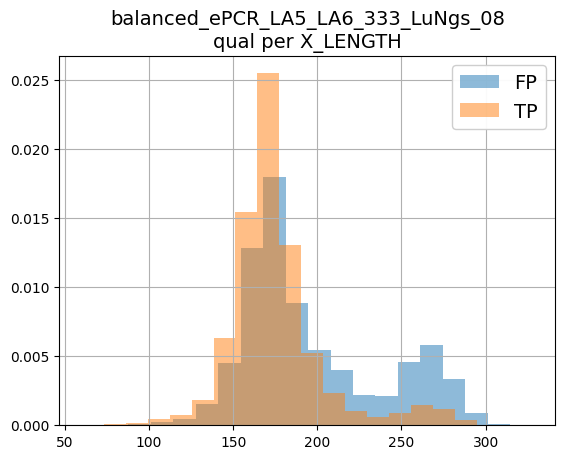

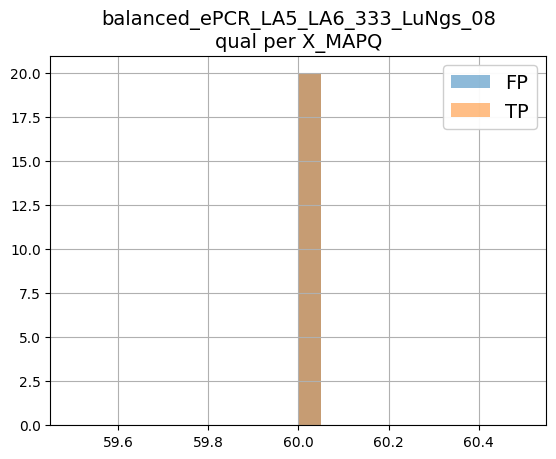

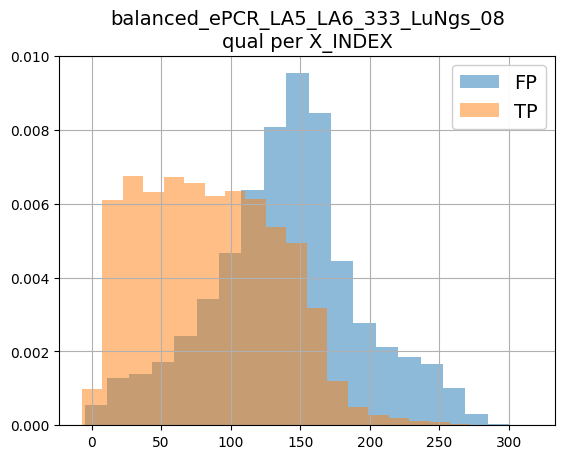

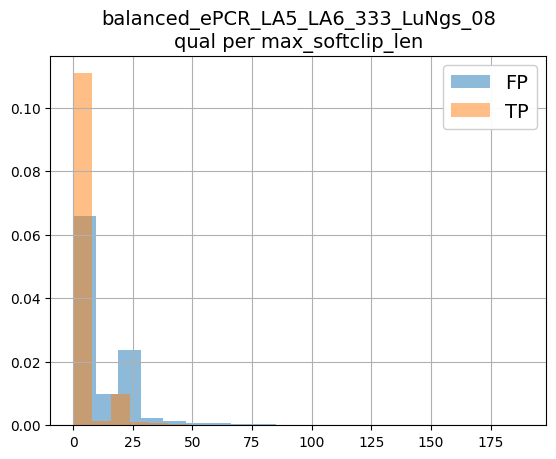

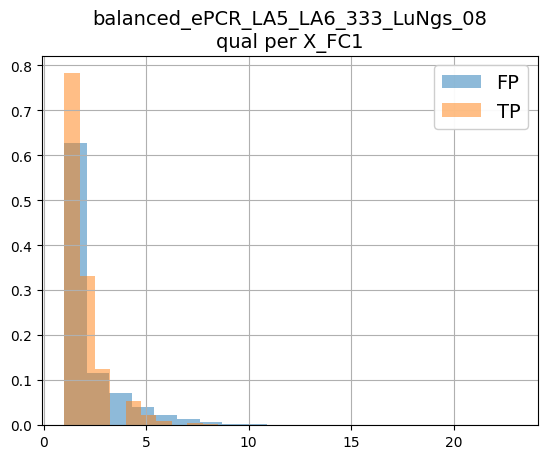

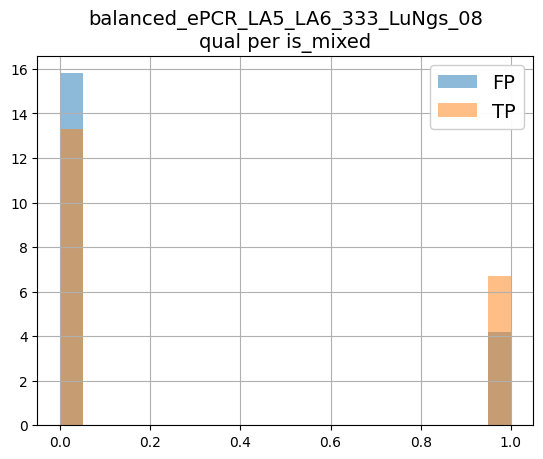

In [12]:
def plot_qual_per_feature(
    labels_dict,
    df,
    max_score,
    title: str = "",
    output_filename: str = None,
    fs = 14,
    ):

    features = cls_features
    if 'is_mixed' in df:
        df['is_mixed'] = df['is_mixed'].astype(int)
    for feature in features:
        plt.figure()
        for label in labels_dict:
            _ = df[df['label']==label][feature].hist(bins=20, alpha=0.5, label=labels_dict[label], density=True)
        legend_handle = plt.legend(fontsize=fs, fancybox=True, framealpha=0.95)
        feature_title = title + feature
        title_handle = plt.title(feature_title, fontsize=fs)    
        output_filename_feature = output_filename+feature
        if output_filename_feature is not None:
            if not output_filename_feature.endswith(".png"):
                output_filename_feature += ".png"
        plt.savefig(
            output_filename_feature,
            facecolor="w",
            dpi=300,
            bbox_inches="tight",
            bbox_extra_artists=[title_handle, legend_handle],
        )

    return

output_qual_per_feature = os.path.join(params['workdir'], f"{params['out_basename']}qual_per_")
plot_qual_per_feature(labels_dict,df,max_score, title=f"{params['data_name']}\nqual per ", output_filename=output_qual_per_feature)

# qual hist by classes, separated by read and variant type: mixed and cycle skip combinations

mixed & cs : Mean ML_QUAL: 24.20, Median ML_QUAL: 24.69
mixed & ~cs : Mean ML_QUAL: 9.52, Median ML_QUAL: 0.18
~mixed & cs : Mean ML_QUAL: 15.77, Median ML_QUAL: 16.43
~mixed & ~cs : Mean ML_QUAL: 4.66, Median ML_QUAL: 0.02


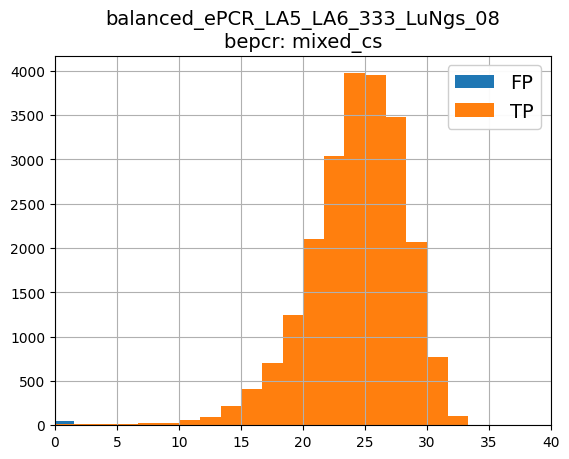

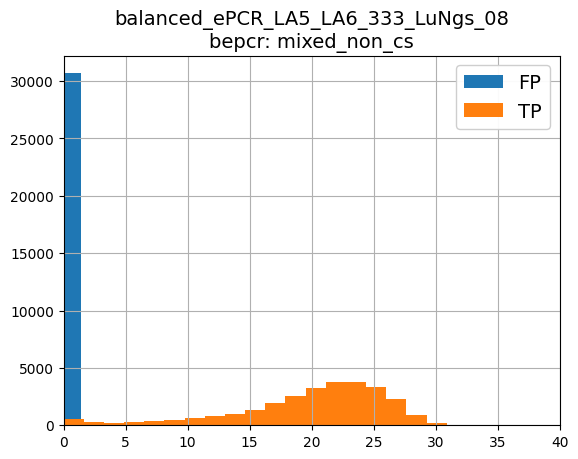

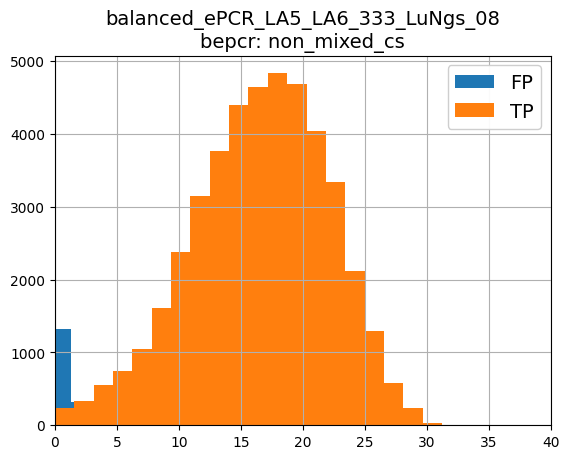

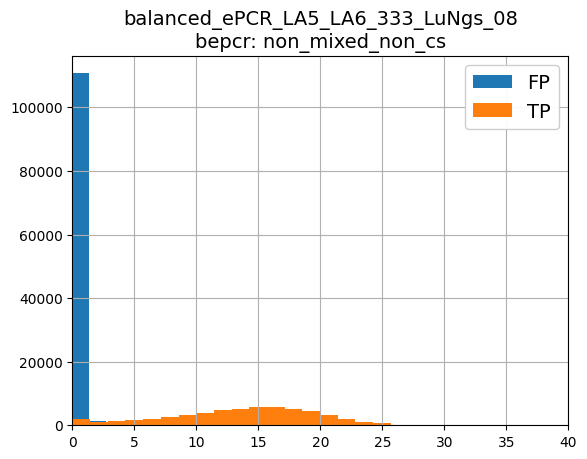

In [8]:
def get_mixed_data(df):
    df_mixed_cs = df[(df['is_mixed']) & (df['cycle_skip_status']=='cycle-skip')]
    df_mixed_non_cs = df[(df['is_mixed']) & (df['cycle_skip_status']!='cycle-skip')]
    df_non_mixed_non_cs = df[(~df['is_mixed']) & (df['cycle_skip_status']!='cycle-skip')]
    df_non_mixed_cs = df[(~df['is_mixed']) & (df['cycle_skip_status']=='cycle-skip')]            
    return df_mixed_cs, df_mixed_non_cs, df_non_mixed_non_cs, df_non_mixed_cs

def get_fpr_recalls_mixed(
        df_mixed_cs,
        df_mixed_non_cs,
        df_non_mixed_cs,
        df_non_mixed_non_cs
    ):
    score = f'XGB_qual_1'
    label = 1
    gtr = df_mixed_cs['label'] == label
    fprs_mixed_cs, recalls_mixed_cs = precision_recall_curve(df_mixed_cs[score], max_score=max_score, y_true=gtr)
    gtr = df_mixed_non_cs['label'] == label
    fprs_mixed_non_cs, recalls_mixed_non_cs = precision_recall_curve(df_mixed_non_cs[score], max_score=max_score, y_true=gtr)
    gtr = df_non_mixed_cs['label'] == label
    fprs_non_mixed_cs, recalls_non_mixed_cs = precision_recall_curve(df_non_mixed_cs[score], max_score=max_score, y_true=gtr)
    gtr = df_non_mixed_non_cs['label'] == label
    fprs_non_mixed_non_cs, recalls_non_mixed_non_cs = precision_recall_curve(df_non_mixed_non_cs[score], max_score=max_score, y_true=gtr)

    return fprs_mixed_cs, recalls_mixed_cs, fprs_mixed_non_cs, recalls_mixed_non_cs, fprs_non_mixed_cs, recalls_non_mixed_cs, fprs_non_mixed_non_cs, recalls_non_mixed_non_cs
def plot_mixed(
    labels_dict,
    df_mixed_cs, 
    df_mixed_non_cs, 
    df_non_mixed_non_cs, 
    df_non_mixed_cs,
    max_score,
    title: str = "",
    output_filename: str = None,
    fs = 14,
    ):

    score = f'XGB_qual_1'

    for td, name in zip([df_mixed_cs, df_mixed_non_cs, df_non_mixed_cs, df_non_mixed_non_cs], 
        ['mixed & cs', 'mixed & ~cs', '~mixed & cs', '~mixed & ~cs']):
        # Mean and median ML_QUAL in [mixed/non-mixed]*[cskp/non-cskp]
        print(name, ': Mean ML_QUAL: {:.2f}, Median ML_QUAL: {:.2f}'.format(td[score].mean(),td[score].median()))
        
    for td, name in zip([df_mixed_cs, df_mixed_non_cs, df_non_mixed_cs, df_non_mixed_non_cs], 
        ['mixed_cs', 'mixed_non_cs', 'non_mixed_cs', 'non_mixed_non_cs']):
        plt.figure()
        plt.title(title+name)
        for label in labels_dict:
            _ = td[td['label']==label][score].clip(upper=max_score).hist(bins=20, label=labels_dict[label])
        # plt.ylim([0, 120000])
        plt.xlim([0,max_score])
        legend_handle = plt.legend(fontsize=fs, fancybox=True, framealpha=0.95)
        feature_title = title + name
        title_handle = plt.title(feature_title, fontsize=fs)    
        output_filename_feature = output_filename+name
        if output_filename_feature is not None:
            if not output_filename_feature.endswith(".png"):
                output_filename_feature += ".png"
        plt.savefig(
            output_filename_feature,
            facecolor="w",
            dpi=300,
            bbox_inches="tight",
            bbox_extra_artists=[title_handle, legend_handle],
        )

    return


if 'is_mixed' in df:
    df_mixed_cs, df_mixed_non_cs, df_non_mixed_non_cs, df_non_mixed_cs = get_mixed_data(df)
    (fprs_mixed_cs, recalls_mixed_cs, fprs_mixed_non_cs, recalls_mixed_non_cs, 
    fprs_non_mixed_cs, recalls_non_mixed_cs, fprs_non_mixed_non_cs, recalls_non_mixed_non_cs) = get_fpr_recalls_mixed(df_mixed_cs, df_mixed_non_cs, df_non_mixed_cs, df_non_mixed_non_cs)

    output_bepcr_hists = os.path.join(params['workdir'], f"{params['out_basename']}bepcr_")
    plot_mixed(labels_dict, df_mixed_cs, df_mixed_non_cs, df_non_mixed_non_cs, df_non_mixed_cs, max_score, title=f"{params['data_name']}\nbepcr: ", output_filename=output_bepcr_hists)

# false positive rate, recalls vs qual

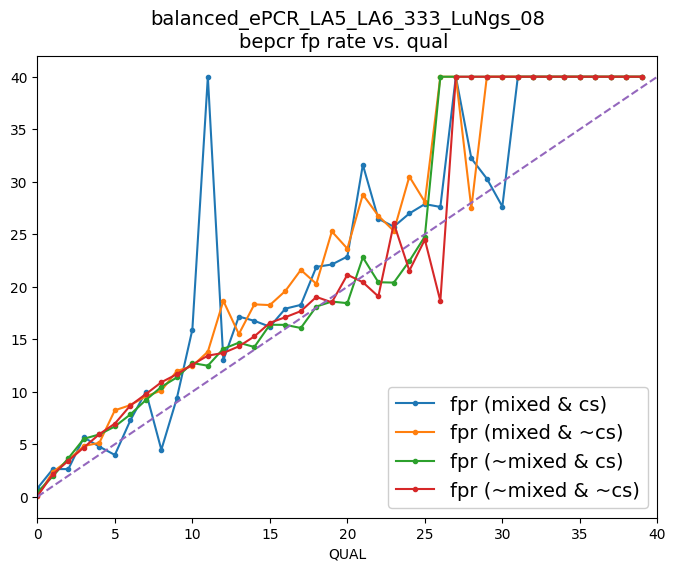

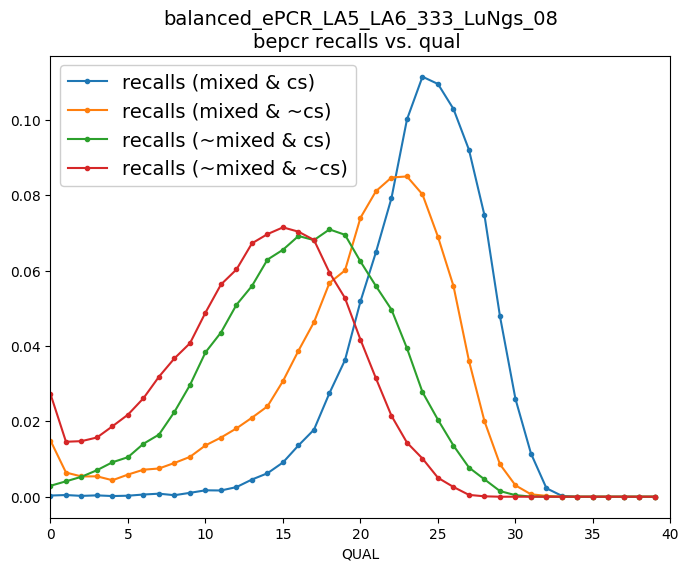

In [12]:


def plot_mixed_fpr(    
    fprs_mixed_cs, 
    fprs_mixed_non_cs, 
    fprs_non_mixed_cs, 
    fprs_non_mixed_non_cs,
    max_score,
    title: str = "",
    output_filename: str = None,
    fs = 14,
    ):

    plt.figure(figsize=(8,6))
    plot_precision_recall([fprs_mixed_cs, fprs_mixed_non_cs, fprs_non_mixed_cs, fprs_non_mixed_non_cs], 
                            ['fpr (mixed & cs)', 'fpr (mixed & ~cs)', 'fpr (~mixed & cs)', 'fpr (~mixed & ~cs)'], 
                            log_scale=False,
                            max_score=max_score)
    plt.plot([0,40], [0,40],'--')
    plt.xlim([0,max_score])
    legend_handle = plt.legend(fontsize=fs, fancybox=True, framealpha=0.95)
    title_handle = plt.title(title, fontsize=fs)    
    if output_filename is not None:
        if not output_filename.endswith(".png"):
            output_filename += ".png"
    plt.savefig(
        output_filename,
        facecolor="w",
        dpi=300,
        bbox_inches="tight",
        bbox_extra_artists=[title_handle, legend_handle],
    )

    return

output_bepcr_fpr = os.path.join(params['workdir'], f"{params['out_basename']}bepcr_fpr")
plot_mixed_fpr(fprs_mixed_cs, fprs_mixed_non_cs, fprs_non_mixed_cs, fprs_non_mixed_non_cs, max_score, title=f"{params['data_name']}\nbepcr fp rate vs. qual ", output_filename=output_bepcr_fpr)

def plot_mixed_recall(
    recalls_mixed_cs, 
    recalls_mixed_non_cs, 
    recalls_non_mixed_cs, 
    recalls_non_mixed_non_cs,
    max_score,
    title: str = "",
    output_filename: str = None,
    fs = 14,
    ):

    plt.figure(figsize=(8,6))
    plot_precision_recall([recalls_mixed_cs, recalls_mixed_non_cs, recalls_non_mixed_cs, recalls_non_mixed_non_cs], 
                          ['recalls (mixed & cs)', 'recalls (mixed & ~cs)', 'recalls (~mixed & cs)', 'recalls (~mixed & ~cs)'], 
                            log_scale=False, max_score=max_score)

    plt.xlim([0,max_score])
    legend_handle = plt.legend(fontsize=fs, fancybox=True, framealpha=0.95)
    title_handle = plt.title(title, fontsize=fs)    
    if output_filename is not None:
        if not output_filename.endswith(".png"):
            output_filename += ".png"
    plt.savefig(
        output_filename,
        facecolor="w",
        dpi=300,
        bbox_inches="tight",
        bbox_extra_artists=[title_handle, legend_handle],
    )

    return

output_bepcr_recalls = os.path.join(params['workdir'], f"{params['out_basename']}bepcr_recalls")
plot_mixed_recall(recalls_mixed_cs, recalls_mixed_non_cs, recalls_non_mixed_cs, recalls_non_mixed_non_cs, max_score, title=f"{params['data_name']}\nbepcr recalls vs. qual ", output_filename=output_bepcr_recalls)
